# Example of environment simulation

In [1]:
import numpy as np
from gxr.envir import EnvirGame, EnvirDynamics, DynamicsPlotter

# Configuration for the game
# can be also read from JSON-file with an analogous structure
# using the `.from_json` constructor method
config = {
    "n_agents": 100,        # number of players
    "E0": .4,
    "scale_capacity": True,
    "envir": {
        "K": 10,
        "T": 10
    },
    "profits": {
        "sustenance": .3,   # sustenance proportionality factor
        "cost": .0,         # harvesting cost proportionality factor
    },
    "foresight": {
        "gamma": .99
    }
}
behavior = {
    "eta": .2,
    "noise": 1,
    # "seed": 303
    "rules": [
        {"alpha": .99, "@rule": "ForesightRule"}
    ]
}
game     = EnvirGame.from_params(**config)
tmax     = 200*round(game.envir.T_epsilon)
dynamics = EnvirDynamics(game, behavior)

/home/guestxr/envir/gxr/envir/dynamics.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sol = dynamics.run(tmax, progress=True)
T, E, P, H = sol.get_arrays()
U   = game.utility.func(P)
sol.ode

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.438e-02 ...  1.998e+03  2.000e+03]
        y: [[ 4.000e+02  4.120e+02 ...  4.978e+02  4.829e+02]
            [ 0.000e+00 -3.706e-02 ...  3.176e+03  3.178e+03]
            ...
            [ 0.000e+00  2.064e-05 ...  5.741e-03  6.693e-03]
            [ 0.000e+00  3.199e-05 ...  4.883e-03  4.170e-03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 3152
     njev: 0
      nlu: 0

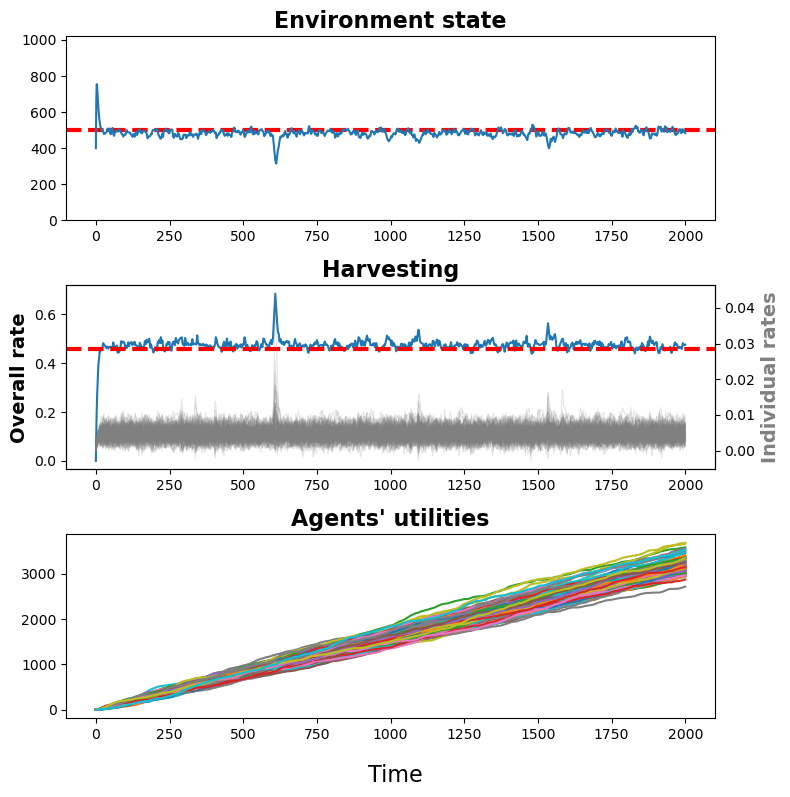

In [4]:
plotter = DynamicsPlotter(dynamics, sol)
fig, axes = plotter.subplots(nrows=3, figsize=(8, 8))

plotter.plot_state(axes[0])
plotter.plot_harvesting(axes[1])
plotter.plot_utilities(axes[2])
fig.tight_layout()
fig